# Backpropagation in a single neuron (or perceptron)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

The activation function we are going to use is the sigmoid

In [2]:
def sigmoid(x):
    y = 1/(1 + np.exp(-x))
    return y

In [3]:
# the derivative of the activation function
def derivative_sigmoid(y):
    return y*(1 - y)

### Create artificial data

In [4]:
# Create dummy data. 100 instances for each class
x1 = np.append(np.random.normal(-1,1,100),np.random.normal(1,1,100))
x2 = np.append(np.random.normal(-1,1,100),np.random.normal(1,1,100))

# Create labels for the two classes
labels = np.append(np.ones(100),np.zeros(100))

# Shuffle de labels en data. This is needed for proper training
sample = list(range(0, 200))
np.random.shuffle(sample)
x1 = x1[sample]
x2 = x2[sample]
labels = labels[sample]

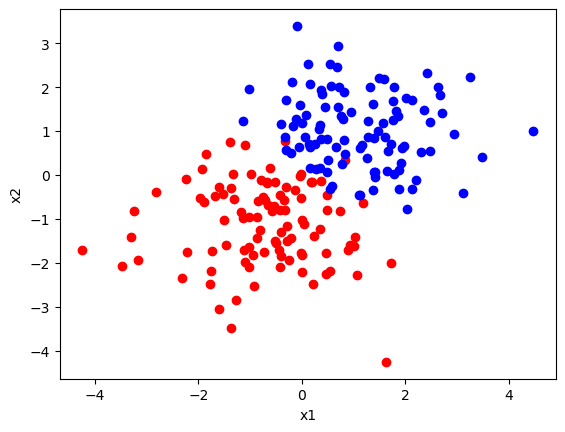

In [5]:
# Plot the dummy data. You can clearly see the data
# is linear seperatable
indpos = np.where(labels==1)
indneg = np.where(labels==0)
plt.scatter(x1[indpos],x2[indpos],color="red")
plt.scatter(x1[indneg],x2[indneg],color="blue")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Training a single neuron with backpropagation

In [6]:
# initiate the weights and the bias
w1 = np.random.rand()
w2 = np.random.rand()
b  = np.random.rand()

In [7]:
lr  = 0.01 # learning rate
epochs = 100 # number of epochs

In [8]:
# We want to keep track of the learning process. 
# We store all the values during learning
monitor_w1 = []
monitor_w2 = []
monitor_b = []
monitor_error = []

In [9]:
for epoch in range(epochs):
    
    average_error = 0
    for k in range(len(labels)):
    
        # De forward pass
        z = w1*x1[k] + w2*x2[k] + b
        output = sigmoid(z)
        error = output - labels[k] # normally this is squared
        
        # backpropagation start
        # The derivative using the chainrule (backpropagation)
        deltaW1 = error * derivative_sigmoid(output) * x1[k]
        deltaW2 = error * derivative_sigmoid(output) * x1[k]
        deltaB  = error * derivative_sigmoid(output)

        # De update rules for the weights and the bias
        w1 = w1 - lr*deltaW1
        w2 = w2 - lr*deltaW2
        b  =  b - lr*deltaB
        # backpropagation end
        
        monitor_w1 += [w1]
        monitor_w2 += [w2]
        monitor_b += [b]
    
        average_error += error**2 # the error^2
    
    average_error /= len(labels)
    monitor_error += [average_error ] 

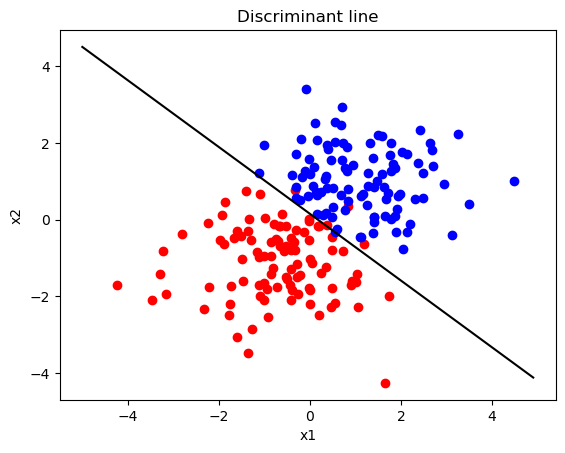

In [10]:
# Plot the discriminant line. This line can be derived from the weights and bias. 
plt.scatter(x1[indpos],x2[indpos],color="red")
plt.scatter(x1[indneg],x2[indneg],color="blue")

rc = -w1/w2
bias = -b/w2
x = np.arange(-5,5,0.1)
y = rc*x+bias

plt.plot(x,y, color="black")
plt.title("Discriminant line")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

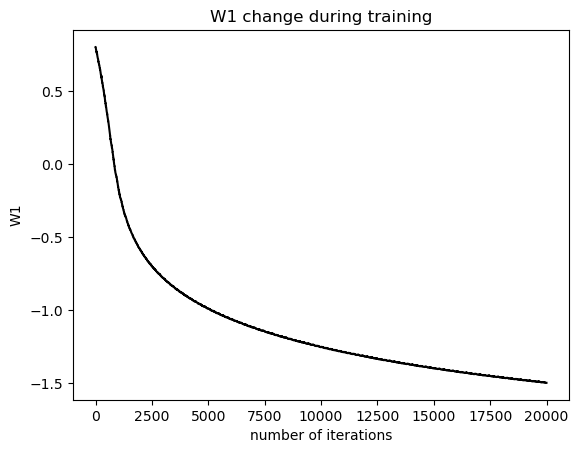

In [11]:
plt.plot(range(20000),monitor_w1, color="black")
plt.title("W1 change during training")
plt.xlabel('number of iterations')
plt.ylabel('W1')
plt.show()

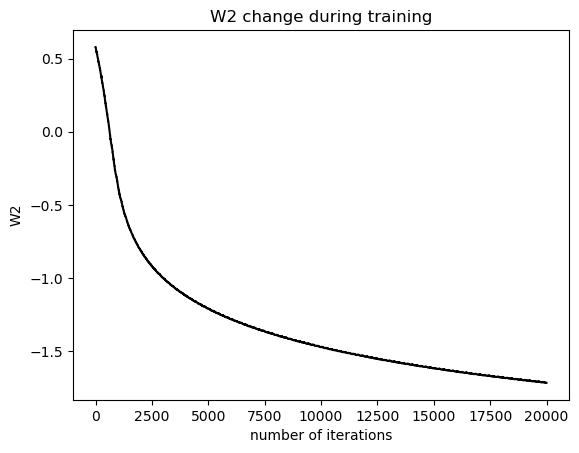

In [12]:
plt.plot(range(20000),monitor_w2, color="black")
plt.title("W2 change during training")
plt.xlabel('number of iterations')
plt.ylabel('W2')
plt.show()

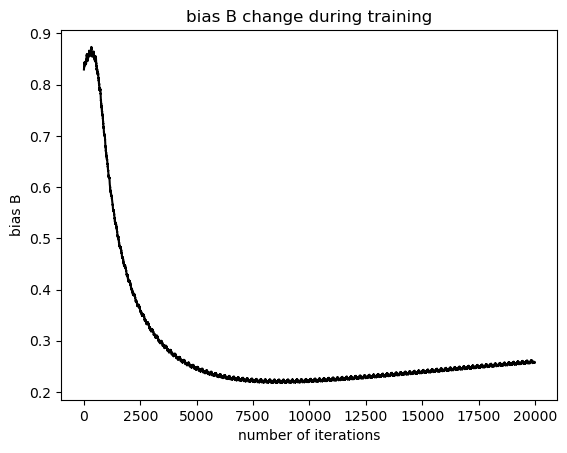

In [13]:
plt.plot(range(20000),monitor_b, color="black")
plt.title("bias B change during training")
plt.xlabel('number of iterations')
plt.ylabel('bias B')
plt.show()

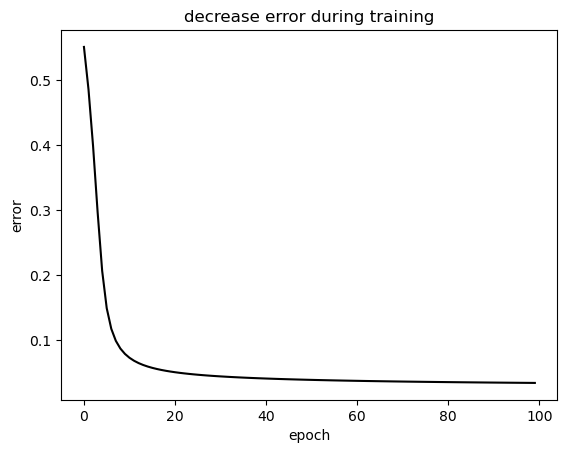

In [14]:
plt.plot(range(epochs),monitor_error, color="black")
plt.title("decrease error during training")
plt.xlabel('epoch')
plt.ylabel('error')
plt.show()